<a href="https://colab.research.google.com/github/Abdullahkitchlew/Machine-Learning/blob/main/Fracture_dedection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medical imaging to analyze and detect different diseases and problems now a day an emerging field.
In this project we will design automated techniques and methods to analyze and detect bone fracture from X-ray images. X-ray images when examined manually it is time consuming and prone to errors. So our proposed system is able to detect fracture more accurately. images are a crucial resource for assessing the severity and prediction of bone injuries caused by trauma or accident. Fracture detection in long bones is a very challenging task due to the limited resolution of the original X-Ray images, as well as the complexity of bone structures and their possible fractures. So our proposed automated bone fracture detection system will work on these aspects.
Functional Requirements:
The system should have the following features:

DATA SET
• Image Datasets are maintained.
• Image is selected for examine.

NOISE REMOVAL (Test Image)
• Image is shown as real image and then focused or noise removed image
• Noise is removed from the image and image is transformed to clearer image so that system
can easily detect fracture

FRACTURE DETECTION
• Clearer image is used to detect fracture
• System detects fracture based on the type of fracture. major fracture 2. Minor fracture 3.
Dislocation etc

DISPLAY BOX AND MEASUREMENTS
• System display the bounding box around the fracture.
• Number of cracks are displayed on screen
• Dislocation is measured
• Bone high and width is measured
• System save the image with all these diagnosis for further usage.
Tools & Technologies Preferred tool and technology
Python
Hardware:
• i3 Processor
• Operating system: Windows 7 and above

# **DENOISING (using Gaussian)**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_float
from skimage import io                    #to import the noisy image
from scipy import ndimage as nd           #Gaussian is part of ndimage in scipy




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#for importing image, directly importing it in floating point as it is required in scikit image that all numbers are in floating point

noisy_img = img_as_float(io.imread('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (1).jpg'))

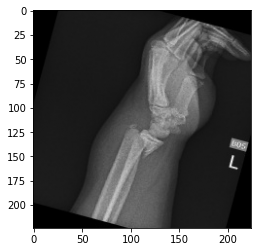

In [ ]:
#Gaussian Filter:

gaussian_img = nd.gaussian_filter(noisy_img, sigma=2)

plt.imshow(noisy_img, cmap='gray')


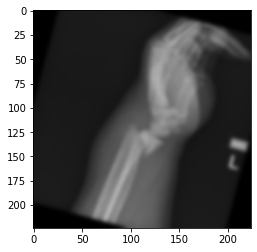

In [ ]:
plt.imshow(gaussian_img, cmap='gray')


# **FRACTURE DETECTION**

In [ ]:
#importing data

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#train_path = '/content/drive/MyDrive/Colab Notebooks/Fracture 1/train/'


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# **Train Data**

In [ ]:


# X = []
# Y = []
# from google.colab.patches import cv2_imshow
# for cls in range(2):
#     #path = train_path + f'/{cls}.jpg'
#     # print(path)
#     img = cv2.imread(path,0)
#     img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)

Xtrain = []
Ytrain = []
classes = {'fractured':0, 'not fractured':1}
from google.colab.patches import cv2_imshow
for cls in classes:
    train_path = '/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/'+cls
    for j in os.listdir(train_path):
        path = train_path +'/'+j
        img = cv2.imread(path,0)
        print(path)
        img = cv2.resize(img, (200,200))
        # img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
        Xtrain.append(img)
        Ytrain.append(classes[cls])
        # print(path)




Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (537).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (536).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (562).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (532).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (531).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (534).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (533).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (560).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (542).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (557).jpg
/content/drive/MyDrive/Colab Notebooks/Fracture Detection/train/fractured/1 (535).jpg
/co

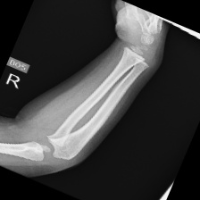

In [ ]:
cv2_imshow(img)

In [ ]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

print (Xtrain)
print (Ytrain)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[0 0 0 ... 1 1 1]


In [ ]:

np.unique(Ytrain)


array([0, 1])

In [ ]:
pd.Series(Ytrain).value_counts()

0    4500
1    4383
dtype: int64

In [ ]:
Xtrain.shape


(8883, 200, 200)

In [ ]:
#plt.imshow (X[0], cmap = 'grey')

Splitting Data and Feature Scaling


In [ ]:
# nsamples, nx, ny= train_dataset.shape
# d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))
Xtrain = Xtrain.reshape(len(Xtrain), -1)
Xtrain.shape

(8883, 40000)

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(Xtrain,Ytrain,random_state=10,test_size=0.30)

#Split data into 70% training & 30% testing data sets
xtrain.shape,xtest.shape

((6218, 40000), (2665, 40000))

In [ ]:
print (xtrain)
print (xtest)
print (ytrain)
print (ytest)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [131 131 131 ...  10  10  10]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[1 1 1 ... 0 1 0]
[1 1 0 ... 0 0 0]


In [ ]:
xtrain.ndim

2

In [ ]:
ytrain.ndim

1

In [ ]:
xtest.ndim

2

In [ ]:
ytest.ndim

1

In [ ]:
print (xtrain)
print (xtest)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [131 131 131 ...  10  10  10]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

252 0
251 0
0.9882352941176471 0.0
0.984313725490196 0.0


Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

MODEL LOGISTIC REGRESSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(solver='lgfgs')
lg = LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)


LogisticRegression(C=0.1)

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9224831135413316
Testing Score: 0.8123827392120075


In [ ]:
sv = SVC()
model = sv.fit(xtrain, ytrain)

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

#precision, F1 score

Training Score: 0.9657446124155677
Testing Score: 0.9272045028142589


In [ ]:
pred = sv.predict(xtest)
np.where(ytest!=pred)

(array([   2,    6,   12,   21,   46,   49,   72,   91,  100,  102,  120,
         142,  156,  165,  169,  175,  207,  241,  245,  261,  265,  273,
         284,  286,  300,  310,  323,  325,  327,  333,  345,  370,  408,
         409,  410,  440,  452,  457,  467,  475,  477,  481,  486,  488,
         494,  495,  500,  510,  525,  533,  613,  623,  625,  727,  728,
         749,  754,  774,  775,  780,  800,  841,  852,  857,  869,  871,
         907,  954,  968, 1025, 1087, 1102, 1124, 1131, 1141, 1163, 1176,
        1188, 1212, 1213, 1232, 1245, 1261, 1276, 1299, 1340, 1350, 1354,
        1362, 1371, 1372, 1410, 1416, 1475, 1516, 1534, 1538, 1543, 1557,
        1563, 1564, 1568, 1582, 1623, 1625, 1647, 1654, 1656, 1672, 1693,
        1703, 1729, 1732, 1752, 1764, 1776, 1813, 1815, 1821, 1833, 1859,
        1861, 1863, 1869, 1875, 1892, 1931, 1958, 1970, 1975, 1988, 1997,
        2002, 2037, 2050, 2054, 2056, 2079, 2085, 2092, 2097, 2099, 2102,
        2126, 2136, 2142, 2151, 2177, 

In [ ]:
val = {0:'No Fracture', 1:'Fractured'}

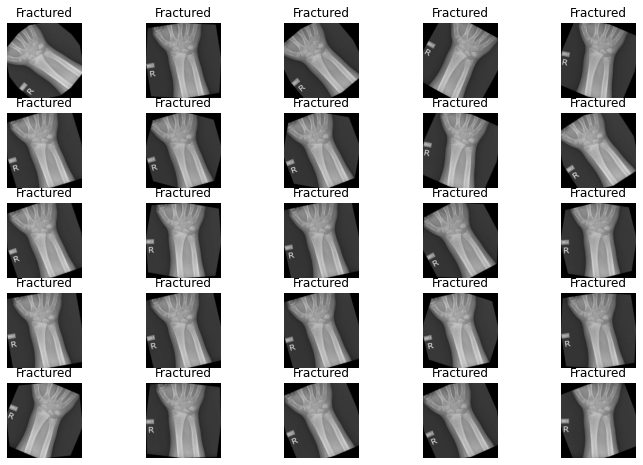

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/')
c=1
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/not fractured/')[:25]:
    plt.subplot(5,5,c)

    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/not fractured/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(val[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

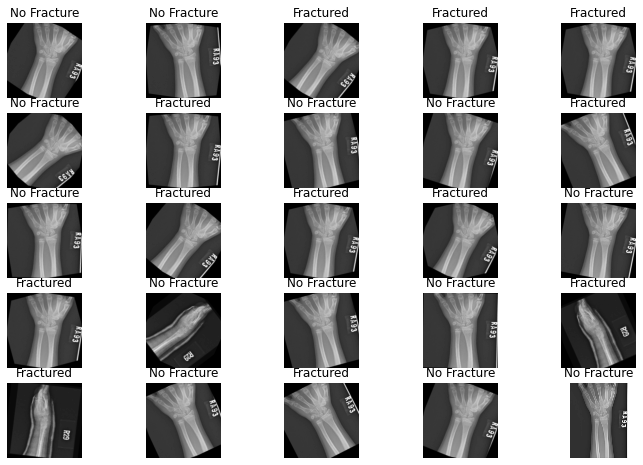

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/')
c=1
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/fractured/')[:25]:
    plt.subplot(5,5,c)

    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fracture Detection/val/fractured/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(val[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1